In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('2022_shelter_cat_outcomes.csv')

In [3]:
print(df)

      age_upon_outcome animal_id animal_type                breed  \
0              2 weeks   A684346         Cat   domestic shorthair   
1              1 month   A685067         Cat   domestic shorthair   
2             3 months   A678580         Cat   domestic shorthair   
3               1 year   A675405         Cat  domestic mediumhair   
4              3 weeks   A670420         Cat   domestic shorthair   
...                ...       ...         ...                  ...   
29416         2 months   A758112         Cat   american shorthair   
29417          1 month   A758569         Cat   domestic shorthair   
29418           1 year   A765938         Cat   domestic shorthair   
29419         6 months   A765832         Cat   domestic shorthair   
29420         6 months   A765831         Cat  domestic mediumhair   

              color        date_of_birth             datetime  \
0            orange  2014-07-07 00:00:00  2014-07-22 16:04:00   
1       blue /white  2014-06-16 00:00:00 

In [4]:
df = df.loc[:, ~df.columns.isin(['animal_id','animal_type','datetime','monthyear','outcome_subtype','count','dob_year','dob_month','dob_monthyear','outcome_hour','breed1','breed2'])]

In [5]:
print(df)

      age_upon_outcome                breed         color  \
0              2 weeks   domestic shorthair        orange   
1              1 month   domestic shorthair   blue /white   
2             3 months   domestic shorthair   white/black   
3               1 year  domestic mediumhair   black/white   
4              3 weeks   domestic shorthair   black/white   
...                ...                  ...           ...   
29416         2 months   american shorthair   blue /white   
29417          1 month   domestic shorthair  brown /white   
29418           1 year   domestic shorthair         brown   
29419         6 months   domestic shorthair           NaN   
29420         6 months  domestic mediumhair        orange   

             date_of_birth         name     outcome_type sex_upon_outcome  \
0      2014-07-07 00:00:00          NaN         Transfer      Intact Male   
1      2014-06-16 00:00:00         Lucy         Adoption    Intact Female   
2      2014-03-26 00:00:00       *Fr

In [6]:
table = pd.pivot_table(data=df,index=['outcome_type','outcome_weekday'],values='Cat/Kitten (outcome)',aggfunc='count')

In [7]:
table

Cat/Kitten (outcome)
outcome_type    outcome_weekday                      
Adoption        Friday                           1489
                Monday                           1429
                Saturday                         3104
                Sunday                           2384
                Thursday                         1273
                Tuesday                          1653
                Wednesday                        1400
Died            Friday                             63
                Monday                             43
                Saturday                           60
                Sunday                             62
                Thursday                           53
                Tuesday                            66
                Wednesday                          56
Disposal        Monday                              7
                Saturday                            3
                Sunday                              4
                Thursday                            1
                Wednesday                           1
Euthanasia      Friday                            204
                Monday                            245
                Saturday                          165
                Sunday                            188
                Thursday                          208
                Tuesday                           233
                Wednesday                         209
Missing         Friday                              9
                Monday                              2
                Saturday                            1
                Sunday                              1
                Thursday                            5
                Tuesday                             4
                Wednesday                           6
Return to Owner Friday                            205
                Monday                            230
                Saturday                          199
                Sunday                            178
                Thursday                          193
                Tuesday                           200
                Wednesday                         226
Rto-Adopt       Friday                              1
                Monday                              8
                Saturday                            5
                Sunday                              4
                Thursday                            2
                Tuesday                             9
                Wednesday                           4
Transfer        Friday                           1963
                Monday                           1977
                Saturday                         1614
                Sunday                           1647
                Thursday                         1883
                Tuesday                          2308
                Wednesday                        1931

In [8]:
tab = table.query('outcome_type=="Adoption"')

In [9]:
tab

Cat/Kitten (outcome)
outcome_type outcome_weekday                      
Adoption     Friday                           1489
             Monday                           1429
             Saturday                         3104
             Sunday                           2384
             Thursday                         1273
             Tuesday                          1653
             Wednesday                        1400

<AxesSubplot:xlabel='outcome_type,outcome_weekday'>

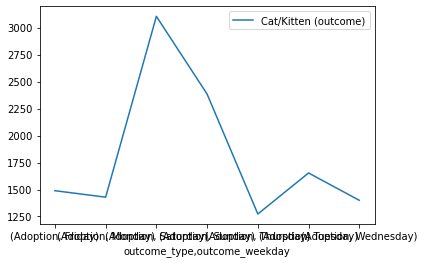

In [10]:
tab.plot()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29421 entries, 0 to 29420
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_upon_outcome      29421 non-null  object 
 1   breed                 29421 non-null  object 
 2   color                 25795 non-null  object 
 3   date_of_birth         29421 non-null  object 
 4   name                  16647 non-null  object 
 5   outcome_type          29418 non-null  object 
 6   sex_upon_outcome      29421 non-null  object 
 7   sex                   29421 non-null  object 
 8   Spay/Neuter           29421 non-null  object 
 9   Periods               29421 non-null  int64  
 10  Period Range          29421 non-null  int64  
 11  outcome_age_(days)    29421 non-null  int64  
 12  outcome_age_(years)   29421 non-null  float64
 13  Cat/Kitten (outcome)  29421 non-null  object 
 14  sex_age_outcome       29421 non-null  object 
 15  age_group          

In [18]:
df.outcome_type

0               Transfer
1               Adoption
2               Adoption
3        Return to Owner
4               Transfer
              ...       
29416           Adoption
29417           Adoption
29418           Transfer
29419           Adoption
29420           Adoption
Name: outcome_type, Length: 29421, dtype: object

In [17]:
df.plot

In [18]:
df.outcome_type.plot